In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("data/cars.csv", delimiter=";")
df[-5:]

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
45,2011,16089528,8113111,389435,219906,2611104,728458,2527190,34116,NaN,1466208
46,2012,17033413,8648875,396119,235949,2794606,751650,2657722,33071,NaN,1515421
47,2013,17939447,9283923,421848,219885,2933050,755950,2722826,36148,NaN,1565817
48,2014,18828721,9857915,427264,211200,3062479,773728,2828466,40731,NaN,1626938
49,2015,19882069,10509258,446822,216566,3235304,802615,2938821,45138,NaN,1687545


In [61]:
y = np.matrix(df.Car[1:]).T
x = np.matrix(df.Car[:-1]).T
# displaying X, Y pairs
np.hstack([x[-4:], y[-4:]])

matrix([[ 8113111,  8648875],
        [ 8648875,  9283923],
        [ 9283923,  9857915],
        [ 9857915, 10509258]])

In [62]:
def linreg_via_np(X, Y, **kwargs):
    theta, e, r, s = np.linalg.lstsq(X, Y)
    return theta

def linreg_via_syseq(X, Y, **kwargs):
    theta = (X.T * X).I * X.T * Y
    return theta

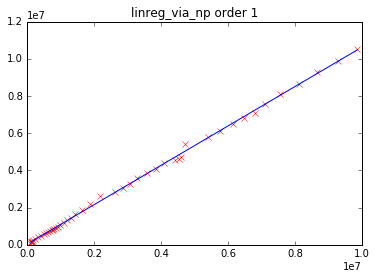

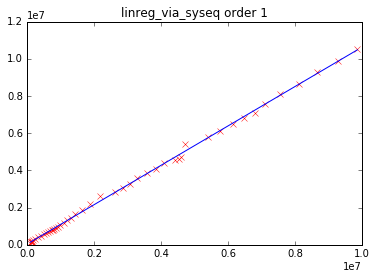

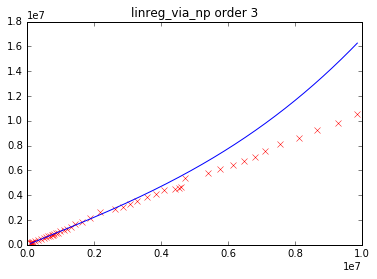

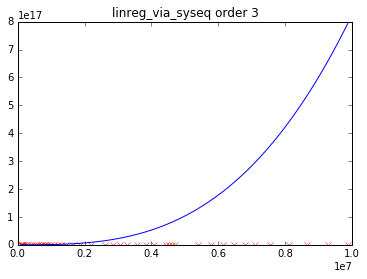

In [63]:
def prepareX(X, order=1, **kwargs):
    return np.hstack([ np.power(X, i) for i in range(order + 1) ])

def test(X, Y, trainer, **kwargs):
    X = prepareX(X, **kwargs)
    
    # plotting the original data
    plt.plot(X[:,1], Y, "rx")
    
    model = trainer(X, Y, **kwargs)
    
    # plotting the model
    xTest = np.linspace(
        int(X[:,1][0] - 1000), 
        int(X[:,1][-1] + 2000), 
        int(X[:,1][-1] - X[:,1][0]) * 2)
    
    xTest = prepareX(np.matrix(xTest).T, **kwargs)
    plt.plot(xTest[:,1], xTest * model)
    plt.title(kwargs.get("title", ""))
    plt.show()

test(X, Y, linreg_via_np, order=1, title="linreg_via_np order 1")
test(X, Y, linreg_via_syseq, order=1, title="linreg_via_syseq order 1")

test(X, Y, linreg_via_np, order=3, title="linreg_via_np order 3")
test(X, Y, linreg_via_syseq, order=3, title="linreg_via_syseq order 3")
